# Web Mining and Applied NLP (44-620)

## Web Scraping and NLP with Requests, BeautifulSoup, and spaCy

### Student Name: Ashley Mersman

Perform the tasks described in the Markdown cells below.  When you have completed the assignment make sure your code cells have all been run (and have output beneath them) and ensure you have committed and pushed ALL of your changes to your assignment repository.

Every question that requires you to write code will have a code cell underneath it; you may either write your entire solution in that cell or write it in a python file (`.py`), then import and run the appropriate code to answer the question.

In [1]:
# Create and activate a Python virtual environment. 
# Before starting the project, try all these imports FIRST
# Address any errors you get running this code cell 
# by installing the necessary packages into your active Python environment.
# Try to resolve issues using your materials and the web.
# If that doesn't work, ask for help in the discussion forums.
# You can't complete the exercises until you import these - start early! 
# We also import pickle and Counter (included in the Python Standard Library).

from collections import Counter
import pickle
import requests
import spacy
from spacytextblob.spacytextblob import SpacyTextBlob
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt

!pip list

print('All prereqs installed.')

Package                       Version
----------------------------- ---------
alabaster                     0.7.12
anaconda-client               1.11.2
anaconda-navigator            2.4.0
anyio                         3.5.0
appdirs                       1.4.4
applaunchservices             0.2.1
appnope                       0.1.2
appscript                     1.1.2
argh                          0.26.2
argon2-cffi                   21.3.0
argon2-cffi-bindings          21.2.0
arrow                         1.2.2
asgiref                       3.7.2
astroid                       2.14.2
astropy                       5.1
asttokens                     2.0.5
atomicwrites                  1.4.0
attrs                         22.1.0
Automat                       20.2.0
autopep8                      1.5.6
Babel                         2.11.0
backcall                      0.2.0
backports.functools-lru-cache 1.6.4
backports.tempfile            1.0
backports.weakref             1.0.post1
backports.zon

scikit-image                  0.19.3
scikit-learn                  1.2.2
scipy                         1.10.1
Scrapy                        2.8.0
seaborn                       0.12.2
semver                        2.13.0
Send2Trash                    1.8.0
service-identity              18.1.0
setuptools                    66.0.0
shiny                         0.4.0
shinyswatch                   0.2.4
shinywidgets                  0.2.1
six                           1.16.0
smart-open                    5.2.1
sniffio                       1.2.0
snowballstemmer               2.2.0
sortedcontainers              2.4.0
soupsieve                     2.4
spacy                         3.6.0
spacy-legacy                  3.0.12
spacy-loggers                 1.0.4
spacytextblob                 4.0.0
Sphinx                        5.0.2
sphinxcontrib-applehelp       1.0.2
sphinxcontrib-devhelp         1.0.2
sphinxcontrib-htmlhelp        2.0.0
sphinxcontrib-jsmath          1.0.1
sphinxcontrib-qthelp  

1. Write code that extracts the article html from https://web.archive.org/web/20210327165005/https://hackaday.com/2021/03/22/how-laser-headlights-work/ and dumps it to a .pkl (or other appropriate file)

In [2]:
import requests 
#Scrape data from website
response = requests.get("https://web.archive.org/web/20210327165005/https://hackaday.com/2021/03/22/how-laser-headlights-work/")
print(response.status_code)



200


In [3]:
print(response.headers['content-type'])

text/html; charset=UTF-8


In [4]:
#save text and print from scraped data
text = response.text
print(text)

<!DOCTYPE html>
<html itemscope="itemscope" itemtype="http://schema.org/Article" lang="en-US">
<head><script type="text/javascript" src="/_static/js/bundle-playback.js?v=1WaXNDFE" charset="utf-8"></script>
<script type="text/javascript" src="/_static/js/wombat.js?v=txqj7nKC" charset="utf-8"></script>
<script type="text/javascript" src="/_static/js/ruffle.js"></script>
<script type="text/javascript">
  __wm.init("https://web.archive.org/web");
  __wm.wombat("https://hackaday.com/2021/03/22/how-laser-headlights-work/","20210327165005","https://web.archive.org/","web","/_static/",
	      "1616863805");
</script>
<link rel="stylesheet" type="text/css" href="/_static/css/banner-styles.css?v=S1zqJCYt" />
<link rel="stylesheet" type="text/css" href="/_static/css/iconochive.css?v=qtvMKcIJ" />
<!-- End Wayback Rewrite JS Include -->

<meta charset="UTF-8">
<meta name="google-site-verification" content="dQIcgy2eQ8-zyE6l15aOsCdxiVDUKl84C_zi-lJivYE"/>
<meta name="google-site-verification" content=

In [5]:
#Save text as a pickle file
with open('article_text.pkl', 'wb') as file:
    pickle.dump(text, file)

2. Read in your article's html source from the file you created in question 1 and print it's text (use `.get_text()`)

In [6]:
# Read the file contents 
with open('article_text.pkl', 'rb') as f:
    article_text = pickle.load(f)

# Parse HTML content 
parser = 'html.parser'
soup = BeautifulSoup(article_text, parser)

article_element = soup.find('article')

# Print text
print(article_element.get_text())



How Laser Headlights Work


                130 Comments            

by:
Lewin Day



March 22, 2021








When we think about the onward march of automotive technology, headlights aren’t usually the first thing that come to mind. Engines, fuel efficiency, and the switch to electric power are all more front of mind. However, that doesn’t mean there aren’t thousands of engineers around the world working to improve the state of the art in automotive lighting day in, day out.
Sealed beam headlights gave way to more modern designs once regulations loosened up, while bulbs moved from simple halogens to xenon HIDs and, more recently, LEDs. Now, a new technology is on the scene, with lasers!

Laser Headlights?!
BWM’s prototype laser headlight assemblies undergoing testing.
The first image brought to mind by the phrase “laser headlights” is that of laser beams firing out the front of an automobile. Obviously, coherent beams of monochromatic light would make for poor illumination outside o

3. Load the article text into a trained `spaCy` pipeline, and determine the 5 most frequent tokens (converted to lower case).  Print the common tokens with an appropriate label.  Additionally, print the tokens their frequencies (with appropriate labels). Make sure to remove things we don't care about (punctuation, stopwords, whitespace).

In [7]:
#load spacy and add pipeline
nlp = spacy.load('en_core_web_sm')
nlp.add_pipe('spacytextblob')
doc = nlp(article_element.get_text())
#remove punctuation and spaces
def filtered_tokens(token):
    return not (token.is_space or token.is_punct or token.is_stop)
#get tokens of interest
interesting_tokens = [token.text.lower() for token in doc if filtered_tokens(token)]
print(interesting_tokens)






['laser', 'headlights', 'work', '130', 'comments', 'lewin', 'day', 'march', '22', '2021', 'think', 'onward', 'march', 'automotive', 'technology', 'headlights', 'usually', 'thing', 'come', 'mind', 'engines', 'fuel', 'efficiency', 'switch', 'electric', 'power', 'mind', 'mean', 'thousands', 'engineers', 'world', 'working', 'improve', 'state', 'art', 'automotive', 'lighting', 'day', 'day', 'sealed', 'beam', 'headlights', 'gave', 'way', 'modern', 'designs', 'regulations', 'loosened', 'bulbs', 'moved', 'simple', 'halogens', 'xenon', 'hids', 'recently', 'leds', 'new', 'technology', 'scene', 'lasers', 'laser', 'headlights', 'bwm', 'prototype', 'laser', 'headlight', 'assemblies', 'undergoing', 'testing', 'image', 'brought', 'mind', 'phrase', 'laser', 'headlights', 'laser', 'beams', 'firing', 'automobile', 'obviously', 'coherent', 'beams', 'monochromatic', 'light', 'poor', 'illumination', 'outside', 'specific', 'spot', 'distance', 'away', 'thankfully', 'eyes', 'laser', 'headlights', 'work', 'way

In [8]:
#Get token frequencies
token_count = Counter(interesting_tokens)
top_5 = token_count.most_common(5)
print(top_5)


[('laser', 35), ('headlights', 19), ('headlight', 11), ('technology', 10), ('led', 10)]


In [9]:
print('Token            Frequency')
for token, count in top_5:
    print(f'{token:<10}{count:>9}')

Token            Frequency
laser            35
headlights       19
headlight        11
technology       10
led              10


4. Load the article text into a trained `spaCy` pipeline, and determine the 5 most frequent lemmas (converted to lower case).  Print the common lemmas with an appropriate label.  Additionally, print the lemmas with their frequencies (with appropriate labels). Make sure to remove things we don't care about (punctuation, stopwords, whitespace).

In [10]:
interesting_lemmas = [token.lemma_.lower() for token in doc if filtered_tokens(token)]
lemma_count = Counter(interesting_lemmas)
top_5_lemma = lemma_count.most_common(5)
print('Token            Frequency')
for lemma, count in top_5_lemma:
    print(f'{lemma:<10}{count:>9}')

Token            Frequency
laser            40
headlight        28
beam             12
technology       10
light            10


5. Define the following methods:
    * `score_sentence_by_token(sentence, interesting_token)` that takes a sentence and a list of interesting token and returns the number of times that any of the interesting words appear in the sentence divided by the number of words in the sentence
    * `score_sentence_by_lemma(sentence, interesting_lemmas)` that takes a sentence and a list of interesting lemmas and returns the number of times that any of the interesting lemmas appear in the sentence divided by the number of words in the sentence
    
You may find some of the code from the in class notes useful; feel free to use methods (rewrite them in this cell as well).  Test them by showing the score of the first sentence in your article using the frequent tokens and frequent lemmas identified in question 3.

In [11]:
'''Create a function that takes a sentence and a list of interesting token 
    and returns the number of times that any of the interesting words appear in the sentence 
    divided by the number of words in the sentence'''

def score_sentence_by_token(sentence, interesting_token):
    #calculate sentence length
    def sentence_length(sentence):
        count = 0
        for token in sentence:
            if not(token.is_space or token.is_punct):
                count += 1
        return count
    #count number of interesting tokens in the sentence
    interesting_token_count = len(([token.text.lower() for token in sentence if token.text.lower() in interesting_tokens]))
    #determine the score by dividing
    score = interesting_token_count/sentence_length(sentence)
    #return the score from above
    return score

#create a list of all sentences in the doc
sentences = list(doc.sents)

print(f'The sentence "{sentences[5]}" has a score of {score_sentence_by_token(sentences[5], interesting_tokens)}.')

The sentence "Now, a new technology is on the scene, with lasers!

Laser Headlights?!
" has a score of 0.5.


In [12]:
'''Create a function that takes a sentence and a list of interesting token 
    and returns the number of times that any of the interesting lemmas appear in the sentence 
    divided by the number of words in the sentence'''

def score_sentence_by_lemma(sentence, interesting_lemma):
    #calculate sentence length
    def sentence_length(sentence):
        count = 0
        for token in sentence:
            if not(token.is_space or token.is_punct):
                count += 1
        return count
    #count number of interesting tokens in the sentence
    interesting_lemma_count = len(([token.lemma_.lower() for token in sentence if token.lemma_.lower() in interesting_lemmas]))
    score = interesting_lemma_count/sentence_length(sentence)
    return score

print(f'The sentence "{sentences[5]}" has a score of {score_sentence_by_lemma(sentences[5], interesting_tokens)}.')

The sentence "Now, a new technology is on the scene, with lasers!

Laser Headlights?!
" has a score of 0.5.


6. Make a list containing the scores (using tokens) of every sentence in the article, and plot a histogram with appropriate titles and axis labels of the scores. From your histogram, what seems to be the most common range of scores (put the answer in a comment after your code)?

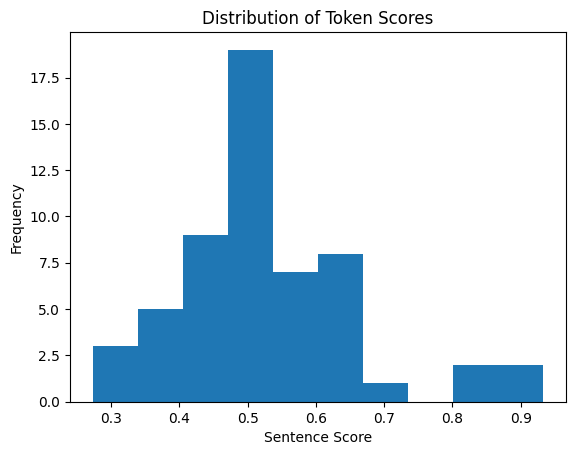

<Figure size 640x480 with 0 Axes>

In [13]:
#scores by token
token_scores = []
for sentence in list(doc.sents):
    score = score_sentence_by_token(sentence, interesting_tokens)
    token_scores.append(score)
    
#Distribution Plot
plt.hist(token_scores)
plt.title('Distribution of Token Scores')
plt.xlabel('Sentence Score')
plt.ylabel('Frequency')
plt.show()
plt.clf()

7. Make a list containing the scores (using lemmas) of every sentence in the article, and plot a histogram with appropriate titles and axis labels of the scores.  From your histogram, what seems to be the most common range of scores (put the answer in a comment after your code)?

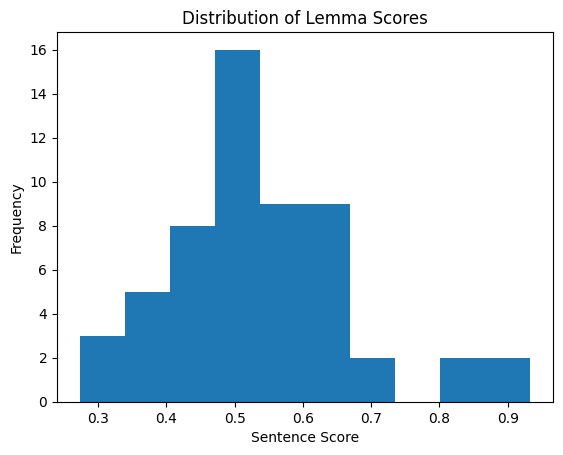

<Figure size 640x480 with 0 Axes>

In [14]:
#scores by lemma
lemma_scores = []
for sentence in list(doc.sents):
    score = score_sentence_by_lemma(sentence, interesting_tokens)
    lemma_scores.append(score)
    
#Distribution Plot
plt.hist(lemma_scores)
plt.title('Distribution of Lemma Scores')
plt.xlabel('Sentence Score')
plt.ylabel('Frequency')
plt.show()
plt.clf()

8. Which tokens and lexems would be ommitted from the lists generated in questions 3 and 4 if we only wanted to consider nouns as interesting words?  How might we change the code to only consider nouns? Put your answer in this Markdown cell (you can edit it by double clicking it).

In [15]:
#create filter for tokens (stopwords, punctuation, spaces, and POS that are not nouns)
def noun_tokens(token):
    #create list of POS tags from spacy documentation that represent nouns
    nouns = ['NOUN', 'PRON', 'PROPN']
    return not (token.is_space or token.is_punct or token.is_stop or token.pos_ not in nouns)

#create new list of interesting tokens that are include nouns
interesting_noun_tokens = [token.text.lower() for token in doc if noun_tokens(token)]

token_count_noun = Counter(interesting_noun_tokens)
top_5_noun_tokens = token_count_noun.most_common(5)

print('Token            Frequency')
for token, count in top_5_noun_tokens:
    print(f'{token:<10}{count:>9}')


Token            Frequency
laser            35
headlights       19
technology       10
headlight         9
beam              7


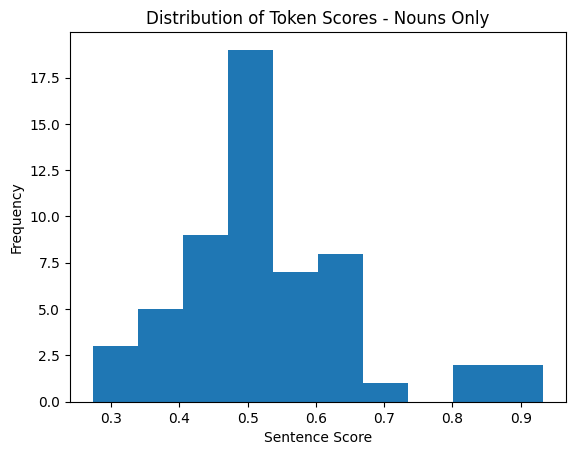

<Figure size 640x480 with 0 Axes>

In [16]:
#scores by token
token_scores = []
for sentence in list(doc.sents):
    score = score_sentence_by_token(sentence, interesting_noun_tokens)
    token_scores.append(score)
    
#Distribution Plot
plt.hist(token_scores)
plt.title('Distribution of Token Scores - Nouns Only')
plt.xlabel('Sentence Score')
plt.ylabel('Frequency')
plt.show()
plt.clf()

In [17]:


interesting_noun_lemmas = [token.lemma_.lower() for token in doc if noun_tokens(token)]

lemma_count_noun = Counter(interesting_noun_lemmas)
top_5_noun_lemmas = lemma_count_noun.most_common(5)

print('Lemma            Frequency')
for lemma, count in top_5_noun_lemmas:
    print(f'{lemma:<10}{count:>9}')

Lemma            Frequency
laser            40
headlight        26
beam             12
technology       10
led               7


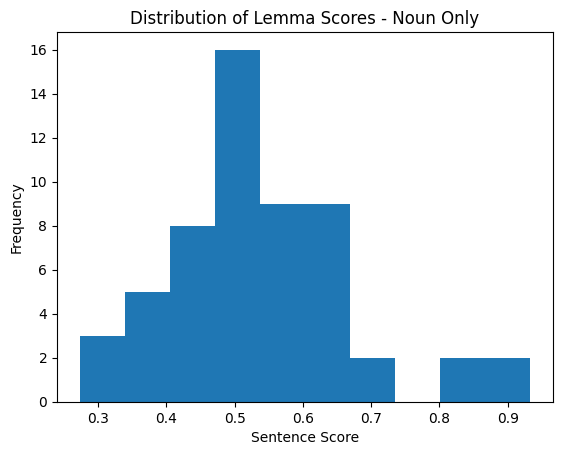

<Figure size 640x480 with 0 Axes>

In [18]:
#scores by lemma
lemma_scores = []
for sentence in list(doc.sents):
    score = score_sentence_by_lemma(sentence, interesting_noun_lemmas)
    lemma_scores.append(score)
    
#Distribution Plot
plt.hist(lemma_scores)
plt.title('Distribution of Lemma Scores - Noun Only')
plt.xlabel('Sentence Score')
plt.ylabel('Frequency')
plt.show()
plt.clf()

In [19]:
!jupyter nbconvert --to html web-scraping.ipynb

[NbConvertApp] Converting notebook web-scraping.ipynb to html
[NbConvertApp] Writing 1173859 bytes to web-scraping.html
